# `geom_function()`

In [1]:
import pandas as pd
from scipy.stats import norm

from lets_plot import *


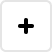
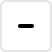
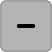
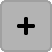
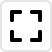
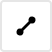
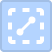
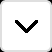
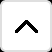
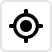

In [2]:
LetsPlot.setup_html()

In [3]:
ggplot() + geom_function(fun=norm.pdf, xlim=[-3, 3])

### 1. Comparison With Empirical Density

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")

xs = df["cty"]

loc, scale = xs.mean(), xs.std()
xmin, xmax = xs.min(), xs.max()

fun = lambda t: norm.pdf(t, loc, scale)

In [5]:
ggplot(df, aes("cty")) + \
    geom_density() + \
    geom_function(fun=fun, xlim=[xmin, xmax], color="red")

### 2. Use Data to Autodetect `xlim`

In [6]:
ggplot(df, aes("cty")) + \
    geom_density() + \
    geom_function(aes("cty"), data=df, fun=fun, color="red")

### 3. Composition of Function and Statistic

In [7]:
ggplot(df, aes("cty")) + \
    geom_density() + \
    geom_function(fun=fun, xlim=[xmin, xmax], \
                  stat='smooth', method='loess', span=.3, color="red")

### 4. Use Different Geometry

In [8]:
ggplot(df, aes("cty")) + \
    geom_density() + \
    geom_function(aes(fill='y'), fun=fun, xlim=[xmin, xmax], n=30, \
                  geom='histogram', alpha=.5) + \
    scale_fill_brewer(type='seq', palette='YlOrRd', trans='reverse')